In [4]:
import pandas as pd
GO_df = pd.read_csv("GO_enrichment_result_with_description_with_depth.csv")
GO_df

,cluster_id,number_of_genes,enriched_GO,p_value,overlapped_number_of_genes,total_genes_in_the_term,adjusted_p_value,term_description,GO_depth
0,2,347,GO:0031072,9.570751e-03,3,27,0.037527,heat shock protein binding,4
1,2,347,GO:0006629,2.867729e-01,4,165,0.483987,lipid metabolic process,5
2,2,347,GO:0006979,9.207711e-01,2,252,1.000000,response to oxidative stress,4
3,2,347,GO:0016987,8.445938e-05,3,6,0.001061,bacterial sigma factor activity,29
4,2,347,GO:0020037,9.793338e-01,6,719,1.000000,heme binding,7
5,2,347,GO:0004672,1.000000e+00,2,1517,1.000000,protein kinase activity,27
6,2,347,GO:0015995,1.041695e-06,4,6,0.000030,chlorophyll biosynthetic process,29
7,2,347,GO:0016620,1.285460e-01,2,38,0.260843,"oxidoreductase activity, acting on the aldehyd...",8
8,2,347,GO:0046872,9.573555e-01,4,481,1.000000,metal ion binding,5
9,2,347,GO:0008270,9.999997e-01,3,1205,1.000000,zinc ion binding,7


In [5]:
import requests, sys
import json
def get_depth(id):
	requestURL = "https://www.ebi.ac.uk/QuickGO/services/ontology/go/terms/GO_ID/ancestors?relations=is_a%2Cpart_of%2Coccurs_in%2Cregulates"
	requestURL = requestURL.replace("GO_ID",id)
	r = requests.get(requestURL, headers={ "Accept" : "application/json"})

	if not r.ok:
		r.raise_for_status()
		sys.exit()

	responseBody = r.text
	my_dict = json.loads(responseBody)
	return my_dict['results'][0]['ancestors']

In [7]:
my_term = []
for row in GO_df.index:
    i = GO_df.at[row,'enriched_GO']
#     print i
    my_term.append(get_depth(i))

In [8]:
GO_df['ancester'] = my_term
GO_df.head()

,cluster_id,number_of_genes,enriched_GO,p_value,overlapped_number_of_genes,total_genes_in_the_term,adjusted_p_value,term_description,GO_depth,ancester
0,2,347,GO:0031072,0.009571,3,27,0.037527,heat shock protein binding,4,"[GO:0031072, GO:0005515, GO:0005488, GO:0003674]"
1,2,347,GO:0006629,0.286773,4,165,0.483987,lipid metabolic process,5,"[GO:0008150, GO:0008152, GO:0006629, GO:004423..."
2,2,347,GO:0006979,0.920771,2,252,1.000000,response to oxidative stress,4,"[GO:0006979, GO:0008150, GO:0006950, GO:0050896]"
3,2,347,GO:0016987,0.000084,3,6,0.001061,bacterial sigma factor activity,29,"[GO:0016987, GO:0019219, GO:2000142, GO:005117..."
4,2,347,GO:0020037,0.979334,6,719,1.000000,heme binding,7,"[GO:0046906, GO:0097159, GO:1901363, GO:004803..."


In [28]:
GO_df.shape

(1043, 10)

In [10]:
GO_df_cutoff = GO_df[GO_df.adjusted_p_value <= 0.05]

In [31]:
# remove this GO term if it appears in the ancester list of another GO term
from copy import deepcopy as dp
temp_list = GO_df_cutoff.ancester.tolist()
selected_row = []
count = 0
for i in GO_df_cutoff.index:
    current_GO = GO_df.at[i,'enriched_GO']
    # check if it appears in the ancester list of other GO terms
    flag = False
    for my_ancester_list in temp_list[:count] + temp_list[count+1 :]:
        if current_GO in my_ancester_list:
            flag = True
            break
    if not flag:
        selected_row.append(i)
    count += 1

In [32]:
GO_df_cutoff.loc[selected_row].shape

(142, 10)

In [13]:
GO_df_selected = GO_df_cutoff.loc[selected_row]
GO_df_selected

,cluster_id,number_of_genes,enriched_GO,p_value,overlapped_number_of_genes,total_genes_in_the_term,adjusted_p_value,term_description,GO_depth,ancester
0,2,347,GO:0031072,9.570751e-03,3,27,3.752742e-02,heat shock protein binding,4,"[GO:0031072, GO:0005515, GO:0005488, GO:0003674]"
3,2,347,GO:0016987,8.445938e-05,3,6,1.061339e-03,bacterial sigma factor activity,29,"[GO:0016987, GO:0019219, GO:2000142, GO:005117..."
6,2,347,GO:0015995,1.041695e-06,4,6,3.018021e-05,chlorophyll biosynthetic process,29,"[GO:0015995, GO:0015994, GO:1901360, GO:190136..."
16,2,347,GO:0006006,2.307657e-04,3,8,2.292273e-03,glucose metabolic process,9,"[GO:0044281, GO:0008150, GO:0019318, GO:000597..."
26,2,347,GO:0019898,8.309144e-06,5,18,1.608096e-04,extrinsic component of membrane,4,"[GO:0016020, GO:0044425, GO:0019898, GO:0005575]"
38,2,347,GO:0015979,1.509196e-06,15,204,3.660677e-05,photosynthesis,5,"[GO:0008150, GO:0008152, GO:0015979, GO:004423..."
39,2,347,GO:0010277,3.855664e-03,2,6,1.955411e-02,chlorophyllide a oxygenase [overall] activity,10,"[GO:0016701, GO:0008150, GO:0016703, GO:001649..."
44,2,347,GO:0015969,2.598596e-03,2,5,1.497423e-02,guanosine tetraphosphate metabolic process,37,"[GO:0019637, GO:0009150, GO:1901360, GO:003403..."
51,2,347,GO:0003747,7.042448e-03,2,8,2.988250e-02,translation release factor activity,42,"[GO:0043604, GO:0043603, GO:0019538, GO:190136..."
52,2,347,GO:0042132,3.855664e-03,2,6,1.955411e-02,"fructose 1,6-bisphosphate 1-phosphatase activity",16,"[GO:0016788, GO:0008150, GO:0008152, GO:004213..."


In [27]:
GO_df.to_csv("GO_enrichment_result_with_description_with_depth_with_ancester2.csv",index=False)

In [30]:
GO_df_cutoff.loc[selected_row].to_csv("GO_df_cutoff_selected_row.csv")

In [1]:
import pandas as pd
GO_df = pd.read_csv("GO_enrichment_result_with_description_with_depth_with_ancester.csv")

In [14]:
import numpy as np

my_enriched_go = GO_df_selected[GO_df_selected.adjusted_p_value <= 0.05].term_description.tolist()
my_enriched_go = list(set(my_enriched_go))
# print len(my_enriched_go)
my_enriched_id = GO_df_selected[GO_df_selected.adjusted_p_value <= 0.05].cluster_id.tolist()
my_enriched_id = list(set(my_enriched_id))
# print len(my_enriched_id)
my_GO_heatmap_df = pd.DataFrame(np.zeros((len(my_enriched_go),len(my_enriched_id))))
my_GO_heatmap_df.index = my_enriched_go
my_GO_heatmap_df.columns = my_enriched_id
from math import log
# -log(8.02392282388E-37,10)
for row in GO_df_selected.index:
    j = GO_df_selected.at[row,'cluster_id']
    i = GO_df_selected.at[row,'term_description']
    my_value = GO_df_selected.at[row,'adjusted_p_value']
    if my_value > 0.05:
        continue
#     print my_value
    if i not in my_enriched_go:
        continue
    if j not in my_enriched_id:
        continue
    
    my_GO_heatmap_df.set_value(i,j,-log(my_value,10))
#     my_GO_heatmap_df.set_value(i,j,my_value)




E:\anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [15]:
my_GO_heatmap_df.shape

(142, 13)

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage,leaves_list
linkage_matrix = linkage(my_GO_heatmap_df.values.T,method="ward")
col_reorder = leaves_list(linkage_matrix)
# print col_reorder

In [23]:
col_reorder_names = my_GO_heatmap_df.columns[col_reorder].tolist()
import seaborn as sns
current_palette = sns.color_palette("hls", 21)
a = dict(zip(range(1,22), current_palette))
# print a
col_color = list(map(lambda x:a[int(x)],col_reorder_names))
my_col_color = pd.DataFrame()
my_col_color['name'] = col_reorder_names
my_col_color['color'] = col_color
my_col_color.set_index('name',inplace=True)
my_col_color

,color
name,
4,"(0.86, 0.8169142857142857, 0.33999999999999997)"
1,"(0.86, 0.3712, 0.33999999999999997)"
2,"(0.86, 0.5197714285714286, 0.33999999999999997)"
3,"(0.86, 0.6683428571428571, 0.33999999999999997)"
12,"(0.33999999999999997, 0.7545142857142858, 0.86)"
6,"(0.6059428571428571, 0.86, 0.33999999999999997)"
5,"(0.7545142857142858, 0.86, 0.33999999999999997)"
10,"(0.33999999999999997, 0.86, 0.6683428571428571)"
8,"(0.33999999999999997, 0.86, 0.3712)"


In [24]:
my_GO_heatmap_df.max()

1      5.545971
2      7.173847
3      4.459008
4     13.663214
5      5.669669
6      5.118594
7      3.031969
8      2.327040
9      2.122998
10     4.121316
11     3.687924
12     5.323318
21     2.474936
dtype: float64

In [26]:
my_GO_heatmap_df.to_csv("my_GO_heatmap_df.csv")

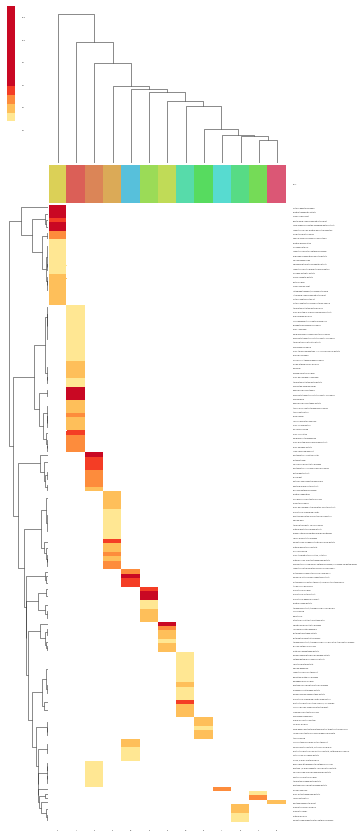

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from matplotlib.colors import LinearSegmentedColormap,ListedColormap
%matplotlib inline
sns.set(color_codes=True)
sns.set(font_scale=0.2)
# fig = pylab.figure(figsize=(10,20))
colors = sns.color_palette("YlOrRd", n_colors=5)
# print [colors[0]] * 5
# myColors = [(1,1,1)]+[colors[0]] * 5 + [colors[1]] * 5+ [colors[2]]* 5+ [colors[3]] * 5+ [colors[4]] * 11
# myColors = [(1,1,1)]+[colors[0]] * 5 + [colors[1]] * 5+ [colors[2]]* 23
myColors = [(1,1,1)]+colors[:-1] + [colors[-1]] * 9
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
# cmap = ListedColormap( myColors,'Custom', len(myColors))

# plot=sns.clustermap(my_GO_heatmap_df,cmap=cmap,method="ward",figsize=(5,30),col_colors = my_col_color,robust=False)
plot=sns.clustermap(my_GO_heatmap_df,cmap=cmap,method="ward",figsize=(5,15),col_colors = my_col_color,robust=False)

# plt.setp(plot.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
# colorbar  = plot.ax_heatmap.collections[0].colorbar
# colorbar.set_ticks([0, 1, 2,3,4,5,34])
# colorbar.set_ticklabels(['0-1', '1-2', '2-3', '3-4', '4-5', '5-34'])
# colorbar.set_label(['xxxxxxx', '1-2', '2-3', '3-4', '4-5', '5-34'])

In [43]:
plot.savefig("GO_heatmap_9_11_2018.png",dpi=600)